In [2]:
# import the necessary modules
import pandas as pd
import numpy as np
import os
#waveform-database:A library of tools for reading, writing, and processing WFDB signals and annotations.
import wfdb 

%matplotlib inline
import matplotlib as mlp
import matplotlib.pyplot as plt

mlp.rc("xtick",labelsize=12)
mlp.rc("ytick",labelsize=12)
mlp.rc("axes",labelsize=14)

MAIN_PATH = "/kaggle/"
DATA_PATH = "/kaggle/input/cardiocare/mit-bih-arrhythmia-database-1.0.0"
FIG_PATH="/kaggle/working/Saving figure"
FIGURE_PATH = os.path.join(FIG_PATH,"saved_figures")
# os.makedirs("saved_figures",exist_ok=True)
os.chdir(DATA_PATH)

#a function to save plotted figures
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(FIGURE_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

C:\Users\ACER\AppData\Local\Temp\ipykernel_13196\1370053147.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


FileNotFoundError: [WinError 3] The system cannot find the path specified: '/kaggle/input/cardiocare/mit-bih-arrhythmia-database-1.0.0'

In [ ]:
records = np.loadtxt(os.path.join(DATA_PATH,"RECORDS"), dtype=str)
print(records)
print(len(records))

['100' '101' '102' '103' '104' '105' '106' '107' '108' '109' '111' '112'
 '113' '114' '115' '116' '117' '118' '119' '121' '122' '123' '124' '200'
 '201' '202' '203' '205' '207' '208' '209' '210' '212' '213' '214' '215'
 '217' '219' '220' '221' '222' '223' '228' '230' '231' '232' '233' '234']
48


In [ ]:
def read_data():
    dataset = []
    for record in records:
        temp = wfdb.rdrecord(record)
        dataset.append(temp.p_signal)
    return dataset
dataset = read_data()

In [ ]:
invalid_beat = [
    "[", "!", "]", "x", "(", ")", "p", "t", 
    "u", "`", "'", "^", "|", "~", "+", "s", 
    "T", "*", "D", "=",'"', "@", "B", "a", "J", "S",
    "r", "F", "e", "j", "n", "f", "Q", "?"
]

label_beats=[
    "A", "L", "/", "V", "R", "E", "N"
]

# Loading signals and segmentation

In [ ]:
import wfdb
import pywt
import numpy as np
from scipy.ndimage import median_filter
from scipy.signal import savgol_filter

def classify(symbol):
    if symbol in label_beats:
        return 1
    else:
        return 0

def segment(signal_MLII, beat_loc):
    window = 180
    x = beat_loc - window
    y = beat_loc + window
    samp = signal_MLII[x:y]
    return samp

def perform_swt(signal, wavelet='db1', level=3):
    # Perform SWT decomposition
    coeffs = pywt.swt(signal, wavelet=wavelet, level=level)
    return coeffs

def two_stage_median_filter(signal, size=3):
    # First stage: apply median filter
    first_stage = median_filter(signal, size=size)
    
    # Second stage: apply median filter again
    second_stage = median_filter(first_stage, size=size)
    
    return second_stage

def apply_savitzky_golay(signal, window_length=5, polyorder=2):
    # Apply Savitzky-Golay filter
    return savgol_filter(signal, window_length=window_length, polyorder=polyorder)

def perform_iswt(coeffs):
    # Perform Inverse SWT
    reconstructed_signal = pywt.iswt(coeffs)
    return reconstructed_signal

# Initialize lists to store signals and labels
all_signals = []
all_labels = []

# Replace 'records' with your actual records list


# Perform filtering and SWT on all signals


# Example output of reconstructed signals



In [ ]:

for record in records:
    temp = wfdb.rdrecord(record)
    annot_temp = wfdb.rdann(record, 'atr')
    ann_sample = annot_temp.sample
    ann_symbol = annot_temp.symbol
    
    # Extract both components of the signal
    signal_MLII = temp.p_signal[:, 0]
    signal_V1 = temp.p_signal[:, 1]  # Assuming the second component is V1, adjust accordingly
    
    for i, i_sample in enumerate(ann_sample):
        label_dec = classify(ann_symbol[i])
        # Segment both signals and stack them along a new axis
        segmentation_MLII = segment(signal_MLII, i_sample)
        segmentation_V1 = segment(signal_V1, i_sample)
        
        # Combine the two segments into a 2D array
        combined_segmentation = np.stack((segmentation_MLII, segmentation_V1), axis=-1)
        
        # Only add the segmentation if it meets your criteria
        if label_dec == 1 and combined_segmentation.shape == (360, 2):
            all_signals.append(combined_segmentation)
            all_labels.append(ann_symbol[i])


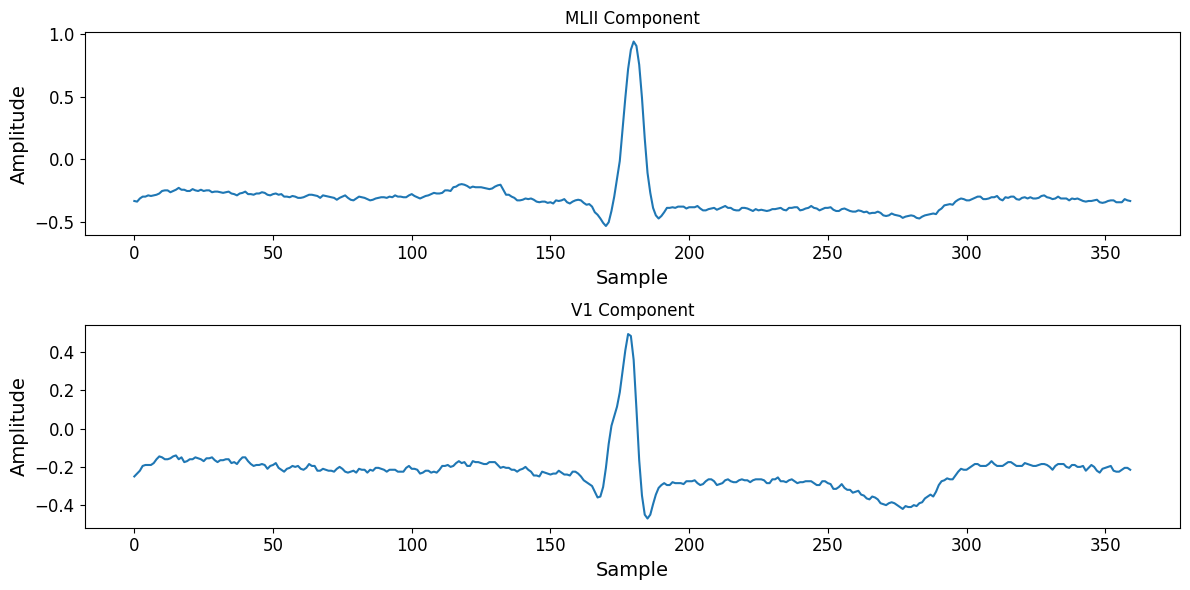

In [ ]:
import matplotlib.pyplot as plt

# Extract the first signal from all_signals
first_signal = all_signals[0]

# Plot the first component (MLII)
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(first_signal[:, 0])
plt.title('MLII Component')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Plot the second component (V1)
plt.subplot(2, 1, 2)
plt.plot(first_signal[:, 1])
plt.title('V1 Component')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


In [ ]:
all_swt_coeffs = []
all_reconstructed_signals = []

# signal process

In [ ]:
all_swt_coeffs1 = []
all_swt_coeffs2 = []

all_reconstructed_signals1 = []
all_reconstructed_signals2 = []

In [ ]:
from tqdm import tqdm

def perform_iswt(coeffs, wavelet='db1'):
    # Perform Inverse SWT
    reconstructed_signal = pywt.iswt(coeffs, wavelet)
    return reconstructed_signal

# Main processing loop with tqdm
for signal in tqdm(all_signals, desc="Processing Signals"):
    # Perform SWT on the original signal
    swt_coeffs = perform_swt(signal[:,0], wavelet='db1')  # Specify the wavelet here
    all_swt_coeffs1.append(swt_coeffs)
    
    # Filter the SWT coefficients (you may need to adjust this part)
    filtered_coeffs = []
    for coeff in swt_coeffs:
        # Apply two-stage median filter and Savitzky-Golay filter to each coefficient
        filtered_detail = two_stage_median_filter(coeff[1])  # Detail coefficients
        smoothed_detail = apply_savitzky_golay(filtered_detail)
        filtered_coeffs.append((coeff[0], smoothed_detail))  # Append approximation and filtered detail

    # Perform ISWT to reconstruct the signal from the filtered coefficients
    reconstructed_signal = perform_iswt(filtered_coeffs, wavelet='db1')
    all_reconstructed_signals1.append(reconstructed_signal)



Processing Signals: 100%|██████████| 107141/107141 [03:31<00:00, 506.11it/s]


In [ ]:
for signal in tqdm(all_signals, desc="Processing Signals"):
    # Perform SWT on the original signal
    swt_coeffs = perform_swt(signal[:,1], wavelet='db1')  # Specify the wavelet here
    all_swt_coeffs2.append(swt_coeffs)
    
    # Filter the SWT coefficients (you may need to adjust this part)
    filtered_coeffs = []
    for coeff in swt_coeffs:
        # Apply two-stage median filter and Savitzky-Golay filter to each coefficient
        filtered_detail = two_stage_median_filter(coeff[1])  # Detail coefficients
        smoothed_detail = apply_savitzky_golay(filtered_detail)
        filtered_coeffs.append((coeff[0], smoothed_detail))  # Append approximation and filtered detail

    # Perform ISWT to reconstruct the signal from the filtered coefficients
    reconstructed_signal = perform_iswt(filtered_coeffs, wavelet='db1')
    all_reconstructed_signals2.append(reconstructed_signal)

Processing Signals: 100%|██████████| 107141/107141 [03:31<00:00, 507.59it/s]


# visualize the preprocess and original signal

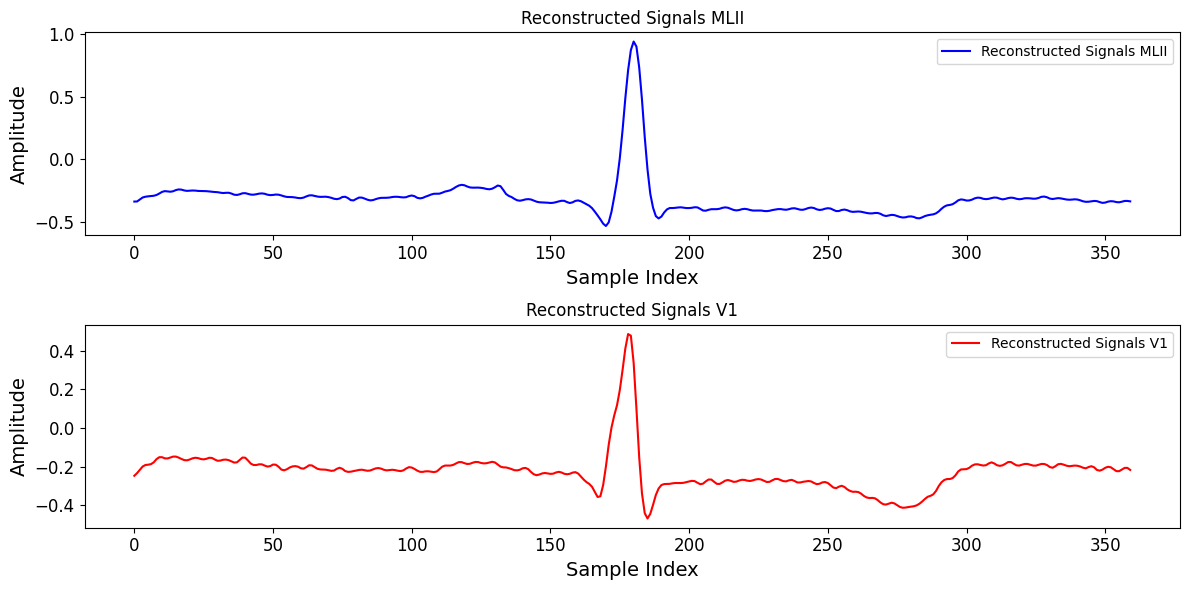

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Convert the list of reconstructed signals to a NumPy array

# Plot original signal
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(all_reconstructed_signals1[0], label='Reconstructed Signals MLII', color='blue')
plt.title('Reconstructed Signals MLII')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(all_reconstructed_signals2[0], label='Reconstructed Signals V1', color='red')
plt.title('Reconstructed Signals V1')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Convert lists of reconstructed signals to NumPy arrays
all_reconstructed_signals1 = np.array(all_reconstructed_signals1)
all_reconstructed_signals2 = np.array(all_reconstructed_signals2)


In [ ]:
len(all_reconstructed_signals2)

107141

In [ ]:
# Ensure signals are of the same length
signal_length = all_reconstructed_signals1.shape[1]

# Stack signals into a single 2D array with two channels
all_signals_fin = np.stack((all_reconstructed_signals1, all_reconstructed_signals2), axis=-1)


In [ ]:
# Assuming signals are in shape (samples, length, channels)
# Reshape to fit (samples, height, width, channels)
all_signals_fin = all_signals_fin.reshape(
    (all_signals_fin.shape[0], signal_length, 1, 2)  # Adjust this based on your CNN's expected input
)


In [ ]:
from sklearn.model_selection import train_test_split

# Example split
X_train, X_test, y_train, y_test = train_test_split(all_signals_fin, all_labels, test_size=0.2, random_state=42)


In [ ]:
X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Example labels

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform training labels
y_train = label_encoder.fit_transform(y_train)

# Transform test labels
y_test = label_encoder.transform(y_test)

# Convert to NumPy arrays
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

print("y_train:", y_train)
print("y_test:", y_test)


y_train: [4. 4. 4. ... 4. 4. 0.]
y_test: [4. 4. 3. ... 4. 6. 6.]


In [ ]:
X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)


In [ ]:
X_train.shape

(85712, 360, 1, 2)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LSTM, TimeDistributed, Input
from tensorflow.keras.utils import to_categorical
import numpy as np

# Define dimensions
timesteps = 360  # Length of each signal
height = 1       # Number of channels (height)
width = 2        # Number of features per measurement (width)
channels = 1     # Number of channels

# Convert labels to one-hot encoded format
num_classes = 7  # Update this according to your number of classes
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

# Define the CNN model
cnn = Sequential([
    Input(shape=(height, width, channels)),
    Conv2D(32, (1, 2), activation='relu', padding='same'),  # Added padding to keep dimensions
    MaxPooling2D(pool_size=(1, 1)),  # Pooling with (1, 1) to avoid reducing dimensions
    Conv2D(64, (1, 2), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(1, 1)),
    Flatten()
])

# Define the CNN-LSTM model
model = Sequential([
    TimeDistributed(cnn, input_shape=(timesteps, height, width, channels)),
    LSTM(units=50),  # Number of units can be adjusted
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  # Use softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_one_hot, epochs=10, batch_size=32, validation_data=(X_test, y_test_one_hot))

# Get predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Print the first 20 actual and predicted values
print("Actual values (first 20):", y_test[:20])
print("Predicted values (first 20):", y_pred[:20])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 407s 134ms/step - accuracy: 0.7330 - loss: 0.8955 - val_accuracy: 0.9027 - val_loss: 0.3301
Epoch 2/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 347s 129ms/step - accuracy: 0.9135 - loss: 0.3035 - val_accuracy: 0.9441 - val_loss: 0.2038
Epoch 3/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 346s 129ms/step - accuracy: 0.9460 - loss: 0.1981 - val_accuracy: 0.9574 - val_loss: 0.1504
Epoch 4/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 345s 129ms/step - accuracy: 0.9568 - loss: 0.1555 - val_accuracy: 0.9643 - val_loss: 0.1294
Epoch 5/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 346s 129ms/step - accuracy: 0.9641 - loss: 0.1348 - val_accuracy: 0.9674 - val_loss: 0.1260
Epoch 6/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 346s 129ms/step - accuracy: 0.9699 - loss: 0.1097 - val_accuracy: 0.9723 - val_loss: 0.1065
Epoch 7/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 347s 130ms/step - accuracy: 0.9736 - loss: 0.1007 - val_accuracy: 0.9773 - val_loss: 0.0866
Epoch 8/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 350s 131ms/step - ac

In [ ]:
# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(X_train, y_train_one_hot, epochs=20, batch_size=32, validation_data=(X_test, y_test_one_hot))

# # Get predictions
# y_pred_probs = model.predict(X_test)
# y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# # Print the first 20 actual and predicted values
# print("Actual values (first 20):", y_test[:20])
# print("Predicted values (first 20):", y_pred[:20])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9793


In [ ]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass problems
print(f"Precision: {precision:.4f}")


Precision: 0.9789


In [ ]:
model.save('my_model.h5')


NameError: name 'model' is not defined

In [ ]:
# import numpy as np

# # Get predictions
# y_pred = model.predict(X_test)
# y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels

# # Print the first 20 actual and predicted values
# print("Actual values (first 20):", y_test[:20])
# print("Predicted values (first 20):", y_pred[:20].flatten())


In [ ]:
# labels_fin=pd.Series(all_labels)

# labels_fin.value_counts()


In [ ]:
# len(all_signals_fin)
# labels_array=np.array(all_labels)

In [ ]:
# df_0=all_signals_fin[labels_fin=='/']
# df_1=all_signals_fin[labels_fin=='A']
# df_2=all_signals_fin[labels_fin=='E']
# df_3=all_signals_fin[labels_fin=='L']
# df_4=all_signals_fin[labels_fin=='N']
# df_5=all_signals_fin[labels_fin=='R']
# df_6=all_signals_fin[labels_fin=='V']
# y_df0=labels_array[labels_fin=='/']
# print(len(df_0))
# print(len(df_1))
# print(len(df_2))

# print(y_df0)
# len(y_df0)

In [ ]:
# from sklearn.utils import resample


In [ ]:
# df0_sampled=resample(df_0, replace=True, n_samples=20000, random_state=42)
# df1_sampled=resample(df_1, replace=True, n_samples=20000, random_state=42)
# df2_sampled=resample(df_2, replace=True, n_samples=20000, random_state=42)
# df3_sampled=resample(df_3, replace=True, n_samples=20000, random_state=42)
# df4_sampled=resample(df_4, replace=True, n_samples=20000, random_state=42)
# df5_sampled=resample(df_5, replace=True, n_samples=20000, random_state=42)
# df6_sampled=resample(df_6, replace=True, n_samples=20000, random_state=42)

In [ ]:
# y_0=['/']*len(df0_sampled)
# y_1=['A']*len(df1_sampled)
# y_2=['E']*len(df2_sampled)
# y_3=['L']*len(df3_sampled)
# y_4=['N']*len(df4_sampled)
# y_5=['R']*len(df5_sampled)
# y_6=['V']*len(df6_sampled)

In [ ]:
# X_final=[]
# X_final.extend(df0_sampled)
# X_final.extend(df1_sampled)
# X_final.extend(df2_sampled)
# X_final.extend(df3_sampled)
# X_final.extend(df4_sampled)
# X_final.extend(df5_sampled)
# X_final.extend(df6_sampled)

In [ ]:
# y_final=[]
# y_final.extend(y_0)
# y_final.extend(y_1)
# y_final.extend(y_2)
# y_final.extend(y_3)
# y_final.extend(y_4)
# y_final.extend(y_5)
# y_final.extend(y_6)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()

In [ ]:
# scaled=scaler.fit_transform(X_final)


In [ ]:
# def check_strat(y):
#     dummy = pd.DataFrame(y,columns=["Labels"])
#     print("Value distribution:\n")
#     count = dummy["Labels"].value_counts()
#     percent = dummy["Labels"].value_counts(normalize=True).mul(100).round(2)
#     print(pd.concat([count,percent],axis=1,keys=["Counts","Percent"]))

In [ ]:
# from sklearn.model_selection import StratifiedShuffleSplit
# strad=StratifiedShuffleSplit()
# assin_strad=strad.split(scaled, y_final)
# train_index, test_index=next(assin_strad)
# train_data_scaled=scaled[train_index]
# from sklearn.preprocessing import LabelEncoder
# lab=LabelEncoder()
# labels_final=lab.fit_transform(y_final)
# lab.classes_

In [ ]:
# train_label=labels_final[train_index]
# assin_val=strad.split(train_data_scaled, train_label)
# train_index_fin, val_index=next(assin_val)
# X_val=train_data_scaled[val_index]
# train_data_scaled_fin=train_data_scaled[train_index_fin]
# train_labels_fin=train_label[train_index_fin]
# y_val=train_label[val_index]
# test_data_scaled=scaled[test_index]
# test_labels=labels_final[test_index]

In [ ]:
# check_strat(test_labels)


In [ ]:
# check_strat(train_label)


In [ ]:
# import os

# # Define a path to the writable directory
# MODEL_PATH = os.path.join('/kaggle/working/', "saved_models")

# # Create the directory
# os.makedirs(MODEL_PATH, exist_ok=True)

# # Print the path to verify
# print(f"Directory created or exists at: {MODEL_PATH}")


# import pickle

# # a function to save trained models in pickle object
# def save_model(name,model,extension=".pickle"):
#     path = os.path.join(MODEL_PATH,name+extension)
#     print("Saving Model : ",name)
#     file = open(path,"wb")
#     pickle.dump(model,file)
#     file.close()

In [ ]:
# from tensorflow import keras
# CNN_X_train=train_data_scaled_fin.reshape(len(train_data_scaled_fin), len(train_data_scaled_fin[0]), 1)
# CNN_val=X_val.reshape(len(X_val), len(X_val[0]), 1)

In [ ]:
# import tensorflow as tf
# from tensorflow import keras

# # Define the CNN model
# CNN_model = keras.Sequential([
#     keras.layers.Conv1D(64, kernel_size=3, input_shape=(360, 1), activation="relu"),
#     keras.layers.MaxPooling1D(pool_size=2),
#     keras.layers.Conv1D(32, kernel_size=3, activation="relu"),
#     keras.layers.MaxPooling1D(pool_size=2),
#     keras.layers.Flatten(),
#     keras.layers.Dense(100, activation="relu"),
#     keras.layers.Dense(7, activation="softmax")
# ])

# # Use `learning_rate` instead of `lr`
# opt = keras.optimizers.Adam(learning_rate=0.0001)

# # Compile the model
# loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False)
# CNN_model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])

# # Print the model summary
# CNN_model.summary()

# # Fit the model
# history = CNN_model.fit(CNN_X_train, train_labels_fin, epochs=10, batch_size=50, validation_data=(CNN_val, y_val))


In [ ]:
# cnn_prediction = CNN_model.predict(test_data_scaled)


In [ ]:
# predicted_classes = np.argmax(cnn_prediction, axis=1)

In [ ]:
# print(predicted_classes[0:20])
# print(test_labels[0:20])